In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder


In [ ]:
h1b = pd.read_csv('/content/drive/MyDrive/h1b_raw.csv')
pd.set_option('display.max_columns',None)

In [ ]:
h1b.head(5)

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,BEGIN_DATE,END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,TRADE_NAME_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_LAST_NAME,EMPLOYER_POC_FIRST_NAME,EMPLOYER_POC_MIDDLE_NAME,EMPLOYER_POC_JOB_TITLE,EMPLOYER_POC_ADDRESS1,EMPLOYER_POC_ADDRESS2,EMPLOYER_POC_CITY,EMPLOYER_POC_STATE,EMPLOYER_POC_POSTAL_CODE,EMPLOYER_POC_COUNTRY,EMPLOYER_POC_PROVINCE,EMPLOYER_POC_PHONE,EMPLOYER_POC_PHONE_EXT,EMPLOYER_POC_EMAIL,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAST_NAME,AGENT_ATTORNEY_FIRST_NAME,AGENT_ATTORNEY_MIDDLE_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,AGENT_ATTORNEY_EMAIL_ADDRESS,LAWFIRM_NAME_BUSINESS_NAME,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS,SECONDARY_ENTITY,SECONDARY_ENTITY_BUSINESS_NAME,WORKSITE_ADDRESS1,WORKSITE_ADDRESS2,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_TRACKING_NUMBER,PW_WAGE_LEVEL,PW_OES_YEAR,PW_OTHER_SOURCE,PW_OTHER_YEAR,PW_SURVEY_PUBLISHER,PW_SURVEY_NAME,TOTAL_WORKSITE_LOCATIONS,AGREE_TO_LC_STATEMENT,H_1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,0,I-200-21270-606997,Certified,26-09-2021,01-10-2021,NaN,H-1B,APPLICATIONS SUPPORT ANALYST/ADMINISTRATOR,15-1132.00,"Software Developers, Applications",Y,01-10-2021,30-09-2024,1,0,0,0,0,1,0,SUEZ WATER MANAGEMENT & SERVICES INC.,NaN,461 From Road,Suite 400,Paramus,NJ,07652,UNITED STATES OF AMERICA,NaN,(1201) 750-5736,NaN,221310,SILVA COSTA CHERADAME,ANABELA,CECILIA,Global Mobility Specialist,461 From Road,Suite 400,Paramus,NJ,07652,UNITED STATES OF AMERICA,NaN,(1201) 750-5736,NaN,cecilia.cheradame@suez.com,Yes,Schrager,Jenny,Spring,1400 Broadway,9th Floor,New York,NY,10018,UNITED STATES OF AMERICA,NaN,(1212) 688-8555,NaN,nizima.ally@fragomen.com,"Fragomen, Del Rey, Bernsen & Loewy LLP",NY,New York Court of Appeals,1,No,NaN,1230 Peachtree St. NE,STE 1100,Atlanta,FULTON,GA,30309,"$92,000.00",NaN,Year,"$87,485.00",Year,NaN,II,7/1/2021 - 6/30/2022,NaN,NaN,NaN,NaN,2,Yes,No,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,1,I-200-21270-606867,Certified,26-09-2021,01-10-2021,NaN,H-1B,Designer,17-3013.00,Mechanical Drafters,Y,11-10-2021,10-10-2024,1,0,0,0,0,1,0,"Sensors, Inc",NaN,6812 State Rd,NaN,Saline,MI,48176,UNITED STATES OF AMERICA,NaN,(1734) 295-9690,NaN,334516,Lovell,Sally,NaN,Manager Human Resources,6812 State Rd,NaN,Saline,MI,48176,UNITED STATES OF AMERICA,NaN,(1734) 295-9690,NaN,slovell@sensors-inc.com,Yes,Stacey,Francyne,NaN,"455 E Eisenhower Pkwy, Suite 300",NaN,Ann Arbor,MI,48108,UNITED STATES OF AMERICA,NaN,(1734) 545-4883,NaN,francyne@staceylawpractice.com,Stacey Law Practice,MI,Michigan Supreme Court,1,No,NaN,6812 State Rd,NaN,Saline,WASHTENAW,MI,48176,"$56,181.00","$61,000.00",Year,"$56,181.00",Year,NaN,II,7/1/2021 - 6/30/2022,NaN,NaN,NaN,NaN,1,Yes,No,No,NaN,NaN,NaN,Disclose Business and Employment,Stacey,Francyne,NaN,Stacey Law Practice,francyne@staceylawpractice.com
2,2,I-200-21270-606846,Certified,26-09-2021,01-10-2021,NaN,H-1B,Data Analyst,15-2031.00,Operations Research Analysts,Y,01-10-2021,30-09-2024,1,1,0,0,0,0,0,"HSP Group, Inc.",NaN,3380 Riviera Lakes Court,NaN,Bonita Springs,FL,34134,UNITED STATES OF AMERICA,NaN,(1508) 545-3286,NaN,5416,Marcinkiewicz,William,NaN,VP Finance & Administration,3380

In [ ]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390554 entries, 0 to 390553
Data columns (total 97 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      390554 non-null  int64  
 1   CASE_NUMBER                     390554 non-null  object 
 2   CASE_STATUS                     390554 non-null  object 
 3   RECEIVED_DATE                   390554 non-null  object 
 4   DECISION_DATE                   390554 non-null  object 
 5   ORIGINAL_CERT_DATE              26419 non-null   object 
 6   VISA_CLASS                      390554 non-null  object 
 7   JOB_TITLE                       390554 non-null  object 
 8   SOC_CODE                        390554 non-null  object 
 9   SOC_TITLE                       390554 non-null  object 
 10  FULL_TIME_POSITION              390554 non-null  object 
 11  BEGIN_DATE                      390554 non-null  object 
 12  END_DATE        

In [ ]:
h1b.describe()

,Unnamed: 0,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_PHONE_EXT,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS,PW_OTHER_YEAR,TOTAL_WORKSITE_LOCATIONS
count,390554.000000,390554.000000,390554.000000,390554.000000,390554.000000,390554.000000,390554.000000,390554.000000,24487.000000,390554.000000,25284.000000,16790.000000,390554.000000,17421.000000,390554.000000
mean,65974.549891,1.806703,0.523321,0.306595,0.152476,0.009266,0.452526,0.366392,456.616450,414158.526939,622.103741,933.406373,1.804025,2020.888927,1.522960
std,39150.093932,5.798315,3.706715,1.615968,1.098944,0.147903,2.393393,1.676657,1259.621719,213705.346925,1561.261908,2242.833357,5.787357,1.241968,0.711864
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1111.000000,0.000000,0.000000,1.000000,1990.000000,1.000000
25%,32546.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334111.000000,0.000000,15.000000,1.000000,2021.000000,1.000000
50%,65092.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541211.000000,0.000000,109.000000,1.000000,2021.000000,1.000000
75%,97638.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,120.000000,541511.000000,265.000000,230.000000,1.000000,2021.000000,2.000000
max,151602.000000,150.000000,100.000000,150.000000,50.000000,30.000000,100.000000,50.000000,9639.000000,928120.000000,9621.000000,9828.000000,150.000000,2022.000000,10.000000


In [ ]:
h1b.isna().sum()

Unnamed: 0                      0
CASE_NUMBER                     0
CASE_STATUS                     0
RECEIVED_DATE                   0
DECISION_DATE                   0
                            ...  
PREPARER_LAST_NAME         183065
PREPARER_FIRST_NAME        183069
PREPARER_MIDDLE_INITIAL    319011
PREPARER_BUSINESS_NAME     177998
PREPARER_EMAIL             180066
Length: 97, dtype: int64

In [ ]:
h1b.drop(['CASE_NUMBER','ORIGINAL_CERT_DATE','SOC_CODE','BEGIN_DATE','AGREE_TO_LC_STATEMENT','END_DATE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','EMPLOYER_ADDRESS1','EMPLOYER_ADDRESS2','EMPLOYER_CITY','EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','NAICS_CODE','EMPLOYER_POC_LAST_NAME','EMPLOYER_POC_FIRST_NAME','EMPLOYER_POC_MIDDLE_NAME','EMPLOYER_POC_JOB_TITLE','EMPLOYER_POC_ADDRESS1','EMPLOYER_POC_ADDRESS2','EMPLOYER_POC_CITY','EMPLOYER_POC_STATE','EMPLOYER_POC_POSTAL_CODE','EMPLOYER_POC_COUNTRY','EMPLOYER_POC_PROVINCE','EMPLOYER_POC_PHONE','EMPLOYER_POC_PHONE_EXT','EMPLOYER_POC_EMAIL','AGENT_ATTORNEY_MIDDLE_NAME','AGENT_ATTORNEY_ADDRESS1','AGENT_ATTORNEY_ADDRESS2','AGENT_ATTORNEY_POSTAL_CODE','AGENT_ATTORNEY_PROVINCE','AGENT_ATTORNEY_PHONE','AGENT_ATTORNEY_PHONE_EXT','AGENT_ATTORNEY_EMAIL_ADDRESS','STATE_OF_HIGHEST_COURT','NAME_OF_HIGHEST_STATE_COURT','WORKSITE_WORKERS','SECONDARY_ENTITY','SECONDARY_ENTITY_BUSINESS_NAME','WORKSITE_ADDRESS1','WORKSITE_ADDRESS2','WORKSITE_COUNTY','EMPLOYER_COUNTRY','WORKSITE_POSTAL_CODE','PW_TRACKING_NUMBER','PW_WAGE_LEVEL','PW_OES_YEAR','PW_OTHER_SOURCE','PW_OTHER_YEAR','PW_SURVEY_PUBLISHER','PW_SURVEY_NAME','APPENDIX_A_ATTACHED','PUBLIC_DISCLOSURE','PREPARER_LAST_NAME','PREPARER_FIRST_NAME','PREPARER_MIDDLE_INITIAL','PREPARER_BUSINESS_NAME','PREPARER_EMAIL','AGENT_ATTORNEY_LAST_NAME','AGENT_ATTORNEY_FIRST_NAME','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','AGENT_ATTORNEY_COUNTRY','TRADE_NAME_DBA','SUPPORT_H1B','STATUTORY_BASIS','LAWFIRM_NAME_BUSINESS_NAME'],axis=1,inplace=True)
print("The Shape of the dataframe is : ", h1b.shape)
h1b['FULL_TIME_POSITION'].unique(),h1b.VISA_CLASS.unique()

The Shape of the dataframe is :  (390554, 25)


(array(['Y', 'N'], dtype=object),
 array(['H-1B', 'E-3 Australian', 'H-1B1 Chile', 'H-1B1 Singapore'],
       dtype=object))

In [ ]:
h1b.head(5)

,Unnamed: 0,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,VISA_CLASS,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,WORKSITE_CITY,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,TOTAL_WORKSITE_LOCATIONS,H_1B_DEPENDENT,WILLFUL_VIOLATOR
0,0,Certified,26-09-2021,01-10-2021,H-1B,APPLICATIONS SUPPORT ANALYST/ADMINISTRATOR,"Software Developers, Applications",Y,1,0,0,0,0,1,0,SUEZ WATER MANAGEMENT & SERVICES INC.,NJ,Yes,Atlanta,GA,"$87,485.00",Year,2,No,No
1,1,Certified,26-09-2021,01-10-2021,H-1B,Designer,Mechanical Drafters,Y,1,0,0,0,0,1,0,"Sensors, Inc",MI,Yes,Saline,MI,"$56,181.00",Year,1,No,No
2,2,Certified,26-09-2021,01-10-2021,H-1B,Data Analyst,Operations Research Analysts,Y,1,1,0,0,0,0,0,"HSP Group, Inc.",FL,Yes,Somerville,MA,"$59,238.00",Year,2,No,No
3,3,Certified,26-09-2021,01-10-2021,H-1B,Pharmaceutical Chemist,Chemists,Y,1,1,0,0,0,0,0,"ANIP Acquisitions, Inc.",MN,Yes,Baudette,MN,"$53,851.00",Year,1,No,No
4,4,Certified,26-09-2021,01-10-2021,H-1B,Senior Systems Analyst JC60,Computer Systems Analysts,Y,1,1,0,0,0,0,0,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,TX,No,CORDOVA,TN,"$70,325.00",Year,1,Yes,No


In [ ]:
h1b = h1b[~(h1b['VISA_CLASS'] == 'H-1B1 Chile')]
h1b = h1b[~(h1b['VISA_CLASS'] == 'H-1B1 Singapore')]
h1b = h1b[~(h1b['VISA_CLASS'] == 'E-3 Australian')]
h1b = h1b[~(h1b['CASE_STATUS'] == 'Certified - Withdrawn')]
h1b = h1b[~(h1b['CASE_STATUS'] == 'Withdrawn')]
h1b.CASE_STATUS = h1b.CASE_STATUS.apply(lambda x: x.replace('Certified','1'))
h1b.CASE_STATUS = h1b.CASE_STATUS.apply(lambda x: x.replace('Denied','0'))
h1b.RECEIVED_DATE = h1b.RECEIVED_DATE.apply(lambda x : datetime.strptime(x,'%d-%m-%Y'))
h1b.DECISION_DATE = h1b.DECISION_DATE.apply(lambda x : datetime.strptime(x,'%d-%m-%Y'))
h1b['Year'] = h1b['RECEIVED_DATE'].dt.strftime('%Y')
h1b.Year = h1b.Year.astype(int)
Time_Taken = h1b.pop('Year')
h1b.insert(3,'Year',Time_Taken)

In [ ]:
h1b.drop(['RECEIVED_DATE','DECISION_DATE','VISA_CLASS'],axis=1,inplace=True)

In [ ]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346678 entries, 0 to 390530
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Unnamed: 0                   346678 non-null  int64 
 1   CASE_STATUS                  346678 non-null  object
 2   Year                         346678 non-null  int64 
 3   JOB_TITLE                    346678 non-null  object
 4   SOC_TITLE                    346678 non-null  object
 5   FULL_TIME_POSITION           346678 non-null  object
 6   TOTAL_WORKER_POSITIONS       346678 non-null  int64 
 7   NEW_EMPLOYMENT               346678 non-null  int64 
 8   CONTINUED_EMPLOYMENT         346678 non-null  int64 
 9   CHANGE_PREVIOUS_EMPLOYMENT   346678 non-null  int64 
 10  NEW_CONCURRENT_EMPLOYMENT    346678 non-null  int64 
 11  CHANGE_EMPLOYER              346678 non-null  int64 
 12  AMENDED_PETITION             346678 non-null  int64 
 13  EMPLOYER_NAME 

In [ ]:
h1b = h1b[~(h1b['Year']==2019)]

In [ ]:
h1b.CASE_STATUS.value_counts()

1    345308
0      1370
Name: CASE_STATUS, dtype: int64

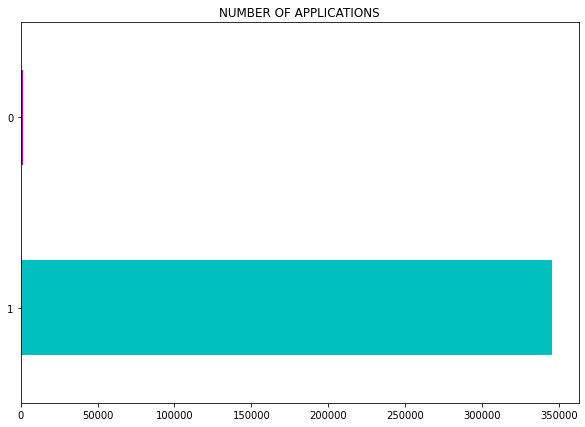

In [ ]:
plt.figure(figsize=(10,7))
colors = ['c', 'm', 'g']
h1b.CASE_STATUS.value_counts().plot(kind='barh',  color=colors)
h1b.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

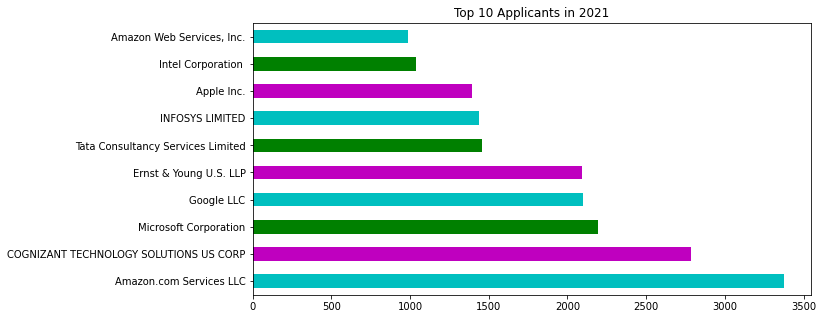

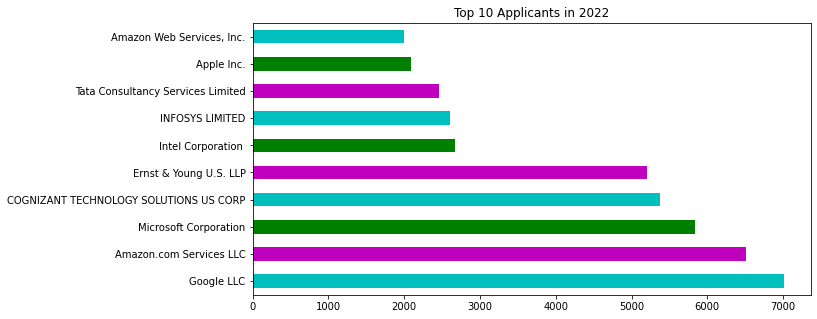

In [ ]:
k = list(h1b.Year.unique())
for i in k:
  plt.figure(figsize=(10,5))
  ax2 = h1b['EMPLOYER_NAME'][h1b['Year'] == i].groupby(h1b['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in '+str(i)                                                                                                                             ,color=colors)
  ax2.set_ylabel("")
  plt.show()

In [ ]:
h1b.EMPLOYER_NAME.value_counts().head(15)

Amazon.com Services LLC                   9881
Google LLC                                9109
COGNIZANT TECHNOLOGY SOLUTIONS US CORP    8165
Microsoft Corporation                     8027
Ernst & Young U.S. LLP                    7287
INFOSYS LIMITED                           4049
Tata Consultancy Services Limited         3920
Intel Corporation                         3715
Apple Inc.                                3486
Amazon Web Services, Inc.                 2991
TATA CONSULTANCY SERVICES LIMITED         2831
Deloitte Consulting LLP                   2238
WAL-MART ASSOCIATES, INC.                 2177
Meta Platforms, Inc.                      2080
CAPGEMINI AMERICA INC                     2014
Name: EMPLOYER_NAME, dtype: int64

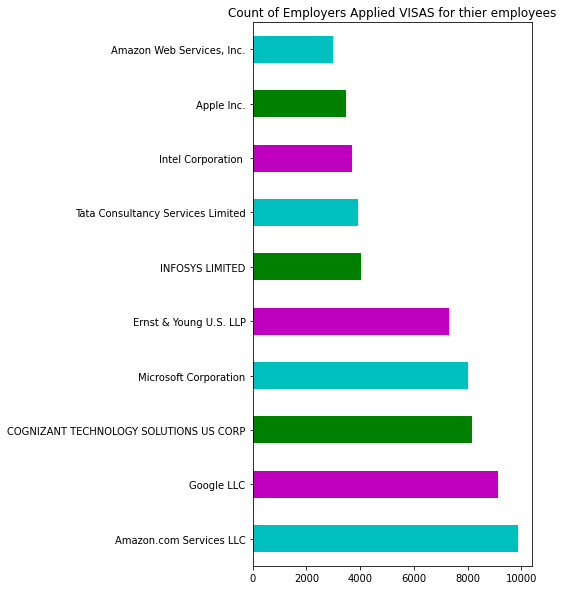

In [ ]:
plot_count_emp = h1b.EMPLOYER_NAME.value_counts().head(10).plot.barh(title = 'Count of Employers Applied VISAS for thier employees',color = colors,figsize=(5,10))

In [ ]:
h1b.PW_UNIT_OF_PAY.unique()

array(['Year', 'Hour', 'Bi-Weekly', 'Week', 'Month'], dtype=object)

In [ ]:
h1b.PREVAILING_WAGE = h1b.PREVAILING_WAGE.apply(lambda x:x.replace('$',''))
h1b.PREVAILING_WAGE = h1b.PREVAILING_WAGE.apply(lambda x:x.replace(',',''))
h1b.PREVAILING_WAGE = h1b.PREVAILING_WAGE.astype(float)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'WAGE DISTRIBUTION BETWEEN 2019 TO 2022')

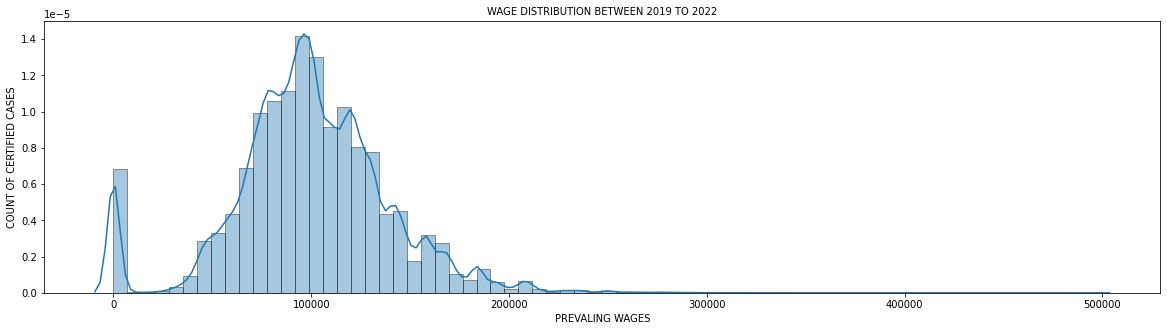

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(h1b['PREVAILING_WAGE'],bins=70,kde=True,hist_kws={"edgecolor": "black"})
plt.xlabel('PREVALING WAGES',size=10)
plt.ylabel('COUNT OF CERTIFIED CASES', size=10)
plt.title('WAGE DISTRIBUTION BETWEEN 2019 TO 2022',size=10)

In [ ]:
dfplot_status_fyear = h1b['Year'].value_counts()
dfplot_status_fyear

2022    234261
2021    112417
Name: Year, dtype: int64

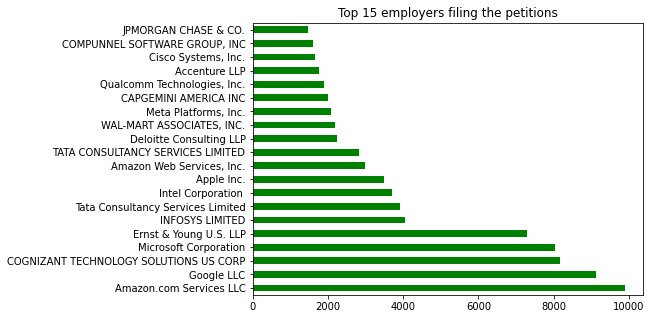

In [ ]:
h1b['EMPLOYER_NAME'].value_counts().head(20).plot.barh(title = "Top 15 employers filing the petitions",
                                                                 color = 'green', figsize = (7, 5))

In [ ]:
h1b.SOC_TITLE.value_counts().head(10)

Software Developers, Applications            84080
Software Developers                          33845
Computer Systems Analysts                    20459
Software Developers, Systems Software        18524
Computer Systems Engineers/Architects        12328
Computer and Information Systems Managers     9891
Information Technology Project Managers       9505
Business Intelligence Analysts                7456
Operations Research Analysts                  6478
Electronics Engineers, Except Computer        6044
Name: SOC_TITLE, dtype: int64

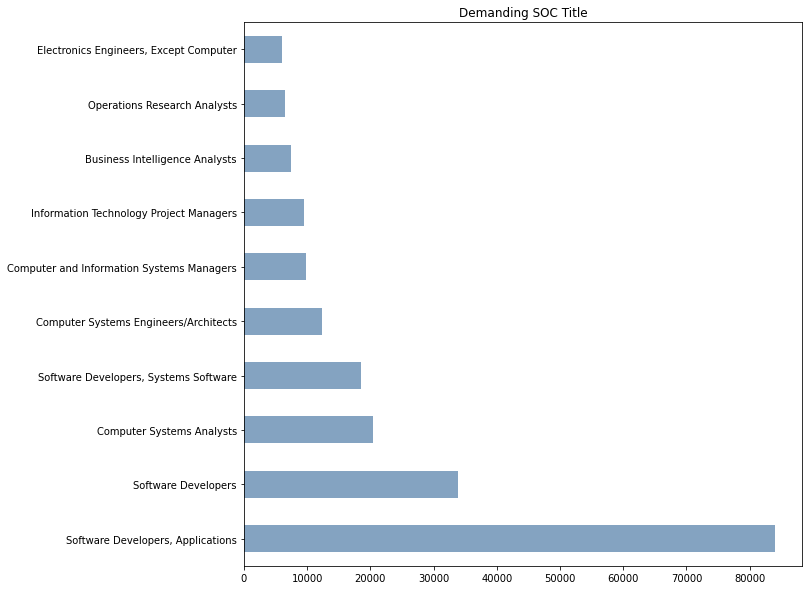

In [ ]:
h1b.SOC_TITLE.value_counts().head(10).plot.barh(title='Demanding SOC Title',color=(0.2, 0.4, 0.6, 0.6),figsize=(10,10))

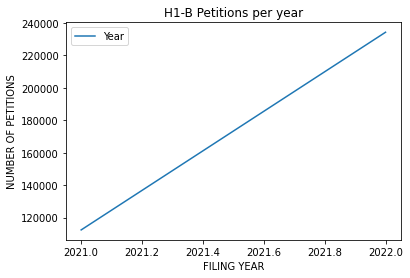

In [ ]:
plot_status_fyear = h1b['Year'].value_counts().sort_index().to_frame()

# Create a line plot of the H1-B petitions by filing year
plot_status_fyear = plot_status_fyear.plot(kind='line', title='H1-B Petitions per year', xlabel='FILING YEAR', ylabel='NUMBER OF PETITIONS')

# Display the plot
plt.show()

In [ ]:
h1b.CASE_STATUS.value_counts()

1    345308
0      1370
Name: CASE_STATUS, dtype: int64

# We performed some transformations to preprocess the data

In [ ]:
h1b_test = h1b.copy()

In [ ]:
h1b_test.drop(['EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','WORKSITE_CITY','TOTAL_WORKSITE_LOCATIONS'],axis=1,inplace=True)
h1b_test.head(5)

,Unnamed: 0,CASE_STATUS,Year,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,H_1B_DEPENDENT,WILLFUL_VIOLATOR
0,0,1,2021,APPLICATIONS SUPPORT ANALYST/ADMINISTRATOR,"Software Developers, Applications",Y,1,0,0,0,0,1,0,SUEZ WATER MANAGEMENT & SERVICES INC.,GA,87485.0,Year,No,No
1,1,1,2021,Designer,Mechanical Drafters,Y,1,0,0,0,0,1,0,"Sensors, Inc",MI,56181.0,Year,No,No
2,2,1,2021,Data Analyst,Operations Research Analysts,Y,1,1,0,0,0,0,0,"HSP Group, Inc.",MA,59238.0,Year,No,No
3,3,1,2021,Pharmaceutical Chemist,Chemists,Y,1,1,0,0,0,0,0,"ANIP Acquisitions, Inc.",MN,53851.0,Year,No,No
4,4,1,2021,Senior Systems Analyst JC60,Computer Systems Analysts,Y,1,1,0,0,0,0,0,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,TN,70325.0,Year,Yes,No


In [ ]:
#def new_copy(name):
h1b_test.H_1B_DEPENDENT = h1b_test.H_1B_DEPENDENT.apply(lambda x: x.replace('No','0'))
h1b_test.H_1B_DEPENDENT = h1b_test.H_1B_DEPENDENT.apply(lambda x: x.replace('Yes','1'))
h1b_test.WILLFUL_VIOLATOR = h1b_test.WILLFUL_VIOLATOR.apply(lambda x: x.replace('No','0'))
h1b_test.WILLFUL_VIOLATOR = h1b_test.WILLFUL_VIOLATOR.apply(lambda x: x.replace('Yes','1'))
h1b_test = pd.get_dummies(h1b_test,columns=['Year','FULL_TIME_POSITION'])
h1b_test = h1b_test.iloc[:, 1:]
h1b_test.drop(['JOB_TITLE','EMPLOYER_NAME'],axis=1,inplace=True)

In [ ]:
h1b_test.head(5)

,CASE_STATUS,SOC_TITLE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,H_1B_DEPENDENT,WILLFUL_VIOLATOR,Year_2021,Year_2022,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y
0,1,"Software Developers, Applications",1,0,0,0,0,1,0,GA,87485.0,Year,0,0,1,0,0,1
1,1,Mechanical Drafters,1,0,0,0,0,1,0,MI,56181.0,Year,0,0,1,0,0,1
2,1,Operations Research Analysts,1,1,0,0,0,0,0,MA,59238.0,Year,0,0,1,0,0,1
3,1,Chemists,1,1,0,0,0,0,0,MN,53851.0,Year,0,0,1,0,0,1
4,1,Computer Systems Analysts,1,1,0,0,0,0,0,TN,70325.0,Year,1,0,1,0,0,1


In [ ]:
#'WORKSITE_STATE','PW_UNIT_OF_PAY'
h1b_test = pd.get_dummies(h1b_test,columns=['WORKSITE_STATE','PW_UNIT_OF_PAY'])
freq = h1b_test['SOC_TITLE'].value_counts(normalize=True)
h1b_test['SOC_TITLE'] = h1b_test['SOC_TITLE'].map(freq)
print(h1b_test.shape)
h1b_test.head(5)

(346678, 76)


,CASE_STATUS,SOC_TITLE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,H_1B_DEPENDENT,WILLFUL_VIOLATOR,Year_2021,Year_2022,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,WORKSITE_STATE_AK,WORKSITE_STATE_AL,WORKSITE_STATE_AR,WORKSITE_STATE_AZ,WORKSITE_STATE_CA,WORKSITE_STATE_CO,WORKSITE_STATE_CT,WORKSITE_STATE_DC,WORKSITE_STATE_DE,WORKSITE_STATE_FL,WORKSITE_STATE_GA,WORKSITE_STATE_GU,WORKSITE_STATE_HI,WORKSITE_STATE_IA,WORKSITE_STATE_ID,WORKSITE_STATE_IL,WORKSITE_STATE_IN,WORKSITE_STATE_KS,WORKSITE_STATE_KY,WORKSITE_STATE_LA,WORKSITE_STATE_MA,WORKSITE_STATE_MD,WORKSITE_STATE_ME,WORKSITE_STATE_MI,WORKSITE_STATE_MN,WORKSITE_STATE_MO,WORKSITE_STATE_MP,WORKSITE_STATE_MS,WORKSITE_STATE_MT,WORKSITE_STATE_NC,WORKSITE_STATE_ND,WORKSITE_STATE_NE,WORKSITE_STATE_NH,WORKSITE_STATE_NJ,WORKSITE_STATE_NM,WORKSITE_STATE_NV,WORKSITE_STATE_NY,WORKSITE_STATE_OH,WORKSITE_STATE_OK,WORKSITE_STATE_OR,WORKSITE_STATE_PA,WORKSITE_STATE_PR,WORKSITE_STATE_RI,WORKSITE_STATE_SC,WORKSITE_STATE_SD,WORKSITE_STATE_TN,WORKSITE_STATE_TX,WORKSITE_STATE_UT,WORKSITE_STATE_VA,WORKSITE_STATE_VI,WORKSITE_STATE_VT,WORKSITE_STATE_WA,WORKSITE_STATE_WI,WORKSITE_STATE_WV,WORKSITE_STATE_WY,PW_UNIT_OF_PAY_Bi-Weekly,PW_UNIT_OF_PAY_Hour,PW_UNIT_OF_PAY_Month,PW_UNIT_OF_PAY_Week,PW_UNIT_OF_PAY_Year
0,1,0.242531,1,0,0,0,0,1,0,87485.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0.000020,1,0,0,0,0,1,0,56181.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0.018686,1,1,0,0,0,0,0,59238.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0.003219,1,1,0,0,0,0,0,53851.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0.059014,1,1,0,0,0,0,0,70325.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#plt.figure(figsize=(10,10))
#sns.heatmap(h1b_test.corr())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
label = 'CASE_STATUS'
features = [i for i in h1b_test.columns if i != 'CASE_STATUS']
X_train,X_test,y_train,y_test = train_test_split(h1b_test[features],h1b_test[label],test_size=0.3,random_state=True)
#model = tree.DecisionTreeClassifier()
#a = model.fit(X_train,y_train)

In [ ]:
importance_scores = model.feature_importances_
print(importance_scores)

[1.72361566e-01 8.82082970e-03 3.05415364e-02 2.63107940e-02
 1.48147740e-02 8.19759415e-03 2.52585797e-02 1.31194341e-02
 4.70612574e-01 1.11853278e-02 2.56496079e-03 3.26453962e-02
 3.11951842e-02 1.57358532e-03 8.28251523e-03 3.77341300e-03
 5.91886533e-04 1.43036038e-03 3.06107102e-03 8.06006824e-03
 3.16661606e-03 3.23638720e-03 8.37004106e-04 4.69714404e-04
 6.98786524e-03 4.01862352e-03 1.04650067e-03 1.25749202e-03
 1.45256024e-03 1.97213148e-03 6.66324464e-03 5.33322014e-03
 9.68667194e-04 4.08573876e-04 9.34755281e-05 7.45720899e-03
 1.01177207e-03 0.00000000e+00 4.15660291e-03 8.50631820e-04
 1.50505836e-03 9.92484859e-04 6.79058230e-05 2.97777605e-04
 2.06529723e-03 1.11883314e-04 6.69249126e-05 3.55104642e-04
 7.81048678e-03 4.76429155e-04 2.23837540e-03 1.03277706e-02
 2.42395052e-03 1.02004442e-04 4.51271857e-03 5.28831804e-03
 2.21545852e-03 3.78053629e-04 7.59281569e-04 0.00000000e+00
 1.70969813e-03 6.68302843e-03 1.53318415e-03 3.99533425e-03
 2.66993569e-03 0.000000

In [ ]:
for importance, name in sorted(zip(model.feature_importances_, X_train.columns),reverse=True)[:5]:
    print (name, importance)

PREVAILING_WAGE 0.47061257364754905
SOC_TITLE 0.17236156609056844
Year_2021 0.032645396189164094
Year_2022 0.031195184172466525
NEW_EMPLOYMENT 0.03054153635892714


In [ ]:
from sklearn.model_selection import train_test_split

# Load the dataset

# Specify the column to stratify the sample on
stratify_col = 'CASE_STATUS'

# Split the dataset into training and testing sets with a 80:20 ratio
train_data, test_data, train_target, test_target = train_test_split(h1b_test,
                                                                    h1b_test[stratify_col],
                                                                    test_size=0.2,
                                                                    stratify=h1b_test[stratify_col],
                                                                    random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))


Accuracy:  0.9942213761009192


ValueError: ignored

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
# initialize SMOTE with sampling strategy and random state
smote = SMOTE(sampling_strategy=0.5, random_state=42)
# create X (features) and y (target)
X = h1b_test[features]
y = h1b_test[label]
# resample the minority class (Denied) using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)
# create a new dataframe with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
# verify the class balance in the resampled data
print(df_resampled['CASE_STATUS'].value_counts())
df_resampled.head(5)

1    345308
0    172654
Name: CASE_STATUS, dtype: int64


,SOC_TITLE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,H_1B_DEPENDENT,WILLFUL_VIOLATOR,Year_2021,Year_2022,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,WORKSITE_STATE_AK,WORKSITE_STATE_AL,WORKSITE_STATE_AR,WORKSITE_STATE_AZ,WORKSITE_STATE_CA,WORKSITE_STATE_CO,WORKSITE_STATE_CT,WORKSITE_STATE_DC,WORKSITE_STATE_DE,WORKSITE_STATE_FL,WORKSITE_STATE_GA,WORKSITE_STATE_GU,WORKSITE_STATE_HI,WORKSITE_STATE_IA,WORKSITE_STATE_ID,WORKSITE_STATE_IL,WORKSITE_STATE_IN,WORKSITE_STATE_KS,WORKSITE_STATE_KY,WORKSITE_STATE_LA,WORKSITE_STATE_MA,WORKSITE_STATE_MD,WORKSITE_STATE_ME,WORKSITE_STATE_MI,WORKSITE_STATE_MN,WORKSITE_STATE_MO,WORKSITE_STATE_MP,WORKSITE_STATE_MS,WORKSITE_STATE_MT,WORKSITE_STATE_NC,WORKSITE_STATE_ND,WORKSITE_STATE_NE,WORKSITE_STATE_NH,WORKSITE_STATE_NJ,WORKSITE_STATE_NM,WORKSITE_STATE_NV,WORKSITE_STATE_NY,WORKSITE_STATE_OH,WORKSITE_STATE_OK,WORKSITE_STATE_OR,WORKSITE_STATE_PA,WORKSITE_STATE_PR,WORKSITE_STATE_RI,WORKSITE_STATE_SC,WORKSITE_STATE_SD,WORKSITE_STATE_TN,WORKSITE_STATE_TX,WORKSITE_STATE_UT,WORKSITE_STATE_VA,WORKSITE_STATE_VI,WORKSITE_STATE_VT,WORKSITE_STATE_WA,WORKSITE_STATE_WI,WORKSITE_STATE_WV,WORKSITE_STATE_WY,PW_UNIT_OF_PAY_Bi-Weekly,PW_UNIT_OF_PAY_Hour,PW_UNIT_OF_PAY_Month,PW_UNIT_OF_PAY_Week,PW_UNIT_OF_PAY_Year,CASE_STATUS
0,0.242531,1,0,0,0,0,1,0,87485.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0.000020,1,0,0,0,0,1,0,56181.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0.018686,1,1,0,0,0,0,0,59238.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0.003219,1,1,0,0,0,0,0,53851.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.059014,1,1,0,0,0,0,0,70325.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_resampled[features],df_resampled[label],test_size=0.3,random_state=True)
tree = DecisionTreeClassifier()

# Create a bagging classifier
bagging = BaggingClassifier(base_estimator=tree, n_estimators=100)

# Train the bagging classifier
bagging.fit(X_train, y_train)

# Evaluate the bagging classifier on the test set
print('Accuracy: {:.2f}'.format(bagging.score(X_test, y_test)))


Accuracy: 0.99


In [ ]:
df_resampled.CASE_STATUS.value_counts()

1    345308
0    172654
Name: CASE_STATUS, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(C=1.0, solver='liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report

y_pred = logmodel.predict(X_test)
print("Accuracy:", logmodel.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.668773207884728


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     51469
           1       0.67      1.00      0.80    103920

    accuracy                           0.67    155389
   macro avg       0.33      0.50      0.40    155389
weighted avg       0.45      0.67      0.54    155389



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randmodel = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
randmodel.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred1 = randmodel.predict(X_test)
print("Accuracy:", randmodel.score(X_test, y_test))
print(classification_report(y_test, y_pred1))

Accuracy: 0.9185399223883286
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     51469
           1       0.92      0.97      0.94    103920

    accuracy                           0.92    155389
   macro avg       0.92      0.89      0.91    155389
weighted avg       0.92      0.92      0.92    155389



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = clf.predict(X_test)
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}

# Perform grid search cross-validation
grid = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best parameter values and accuracy score
print('Best parameters:', grid.best_params_)
print('Accuracy:', grid.best_score_)

NameError: ignored